In [2]:
import pandas as pd

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

def create_stacked_chart(df, x_col, y_col, values, x_label, y_label, title, legend_title, hue_names=None):
  pivot_df =  df.pivot(index=x_col, columns=y_col, values=values)
  if hue_names:
    pivot_df.columns = hue_names

  pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

  # Customize
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks(rotation=0)
  plt.legend(title=legend_title)
  plt.tight_layout()
  plt.show()

def create_pdf(df, title, x_col, hue_col, x_label, y_label, legend_title):
  plt.figure(figsize=(10, 6))
  sns.kdeplot(data=df, x=x_col, hue=hue_col)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.gca().get_legend().set_title(title=legend_title)
  plt.tight_layout()
  plt.show()

def grouped_stack(df, x_ticks, stack_col, val_col, legen_val, x_label, y_label, title):
  pivot_df = df.pivot_table(index=x_ticks, columns=stack_col, values=val_col).reset_index()

  x_ticks_uniq = pivot_df[x_ticks[0]].unique()
  category_uniq = pivot_df[x_ticks[1]].unique()
  x = np.arange(len(x_ticks_uniq))
  bar_width = 0.35

  fig, ax = plt.subplots(figsize=(10, 7))

  for i, cat in enumerate(category_uniq):
    temp = pivot_df[pivot_df[x_ticks[1]] == cat]
    ax.bar(x + (i - 0.5) * bar_width, temp[legen_val[0]], width=bar_width, label=f'{cat} {legen_val[0]}')
    ax.bar(x + (i - 0.5) * bar_width, temp[legen_val[1]], width=bar_width,
           bottom=temp[legen_val[0]], label=f'{cat} {legen_val[1]}')

  ax.set_xticks(x)
  ax.set_xticklabels(x_ticks_uniq)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_title(title)
  ax.legend(ncol=2)
  plt.tight_layout()
  plt.show()

In [1]:
import pandas as pd

av_gene_v2 = pd.read_csv('simulacrum_v2/data/sim_av_gene.csv', header=0)
av_tumour_v2 = pd.read_csv('simulacrum_v2/data/sim_av_tumour.csv', header=0)
av_patient_v2 = pd.read_csv('simulacrum_v2/data/sim_av_patient.csv', header=0)
sact_outcome_v2 = pd.read_csv('simulacrum_v2/data/sim_sact_outcome.csv', header=0)
sact_regimen_v2 = pd.read_csv('simulacrum_v2/data/sim_sact_regimen.csv', header=0)
sact_drug_v2 = pd.read_csv('simulacrum_v2/data/sim_sact_drug_detail.csv', header=0)
sact_cycle_v2 = pd.read_csv('simulacrum_v2/data/sim_sact_cycle.csv', header=0)
rtds_combined = pd.read_csv('simulacrum_v2/data/sim_rtds_combined.csv', header=0)
rtds_episode = pd.read_csv('simulacrum_v2/data/sim_rtds_episode.csv', header=0)
rtds_exposure = pd.read_csv('simulacrum_v2/data/sim_rtds_exposure.csv', header=0)
rtds_prescription = pd.read_csv('simulacrum_v2/data/sim_rtds_prescription.csv', header=0)
patient_tumour_v2 = pd.merge(av_patient_v2, av_tumour_v2, left_on="PATIENTID", right_on="PATIENTID", how="inner")
patient_tumour_v2['SITE_ICD10_O2_3CHAR'] = patient_tumour_v2['SITE_ICD10_O2_3CHAR'].map({
  'C34': 'Lung', 'C44': 'Skin', 'C50': 'Breast', 'C61': 'Prostate', 'C91': 'Leukemia', 
  'C92': 'Leukemia', 'C93': 'Leukemia', 'C94': 'Leukemia', 'C96': 'Leukemia'
})

C:\Users\maran\AppData\Local\Temp\ipykernel_10152\1572629282.py:4: DtypeWarning: Columns (14,15,16,17,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  av_tumour_v2 = pd.read_csv('simulacrum_v2/data/sim_av_tumour.csv', header=0)
C:\Users\maran\AppData\Local\Temp\ipykernel_10152\1572629282.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  sact_cycle_v2 = pd.read_csv('simulacrum_v2/data/sim_sact_cycle.csv', header=0)
C:\Users\maran\AppData\Local\Temp\ipykernel_10152\1572629282.py:10: DtypeWarning: Columns (15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  rtds_combined = pd.read_csv('simulacrum_v2/data/sim_rtds_combined.csv', header=0)
C:\Users\maran\AppData\Local\Temp\ipykernel_10152\1572629282.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  rtds_episode = pd.read_csv('simulacrum_v2/data/sim_rtds_ep

In [8]:
print(len(patient_tumour_v2.query("SITE_ICD10_O2_3CHAR not in ('Lung', 'Skin', 'Breast', 'Prostate', 'Leukemia')").index))
patient_tumour_v2.query("SITE_ICD10_O2_3CHAR not in ('Lung', 'Skin', 'Breast', 'Prostate', 'Leukemia')")["SITE_ICD10_O2_3CHAR"].isna().sum()

923210


923210

In [13]:
import re

selected_patient_tumour_v2 = patient_tumour_v2.query("SITE_ICD10_O2_3CHAR in ('Lung', 'Skin', 'Breast', 'Prostate', 'Leukemia') and (VITALSTATUS!='D4' or VITALSTATUS!='D5' or VITALSTATUS!='D3')")
selected_patient_tumour_v2 = selected_patient_tumour_v2[selected_patient_tumour_v2['VITALSTATUS'].notnull()]

selected_patient_tumour_v2['VITALSTATUS'] = selected_patient_tumour_v2['VITALSTATUS'].map({
  'A': 'Alive', 'D': 'Deceased', 'X2': 'Alive', 'X4': 'Alive', 'X5': 'Alive'
})

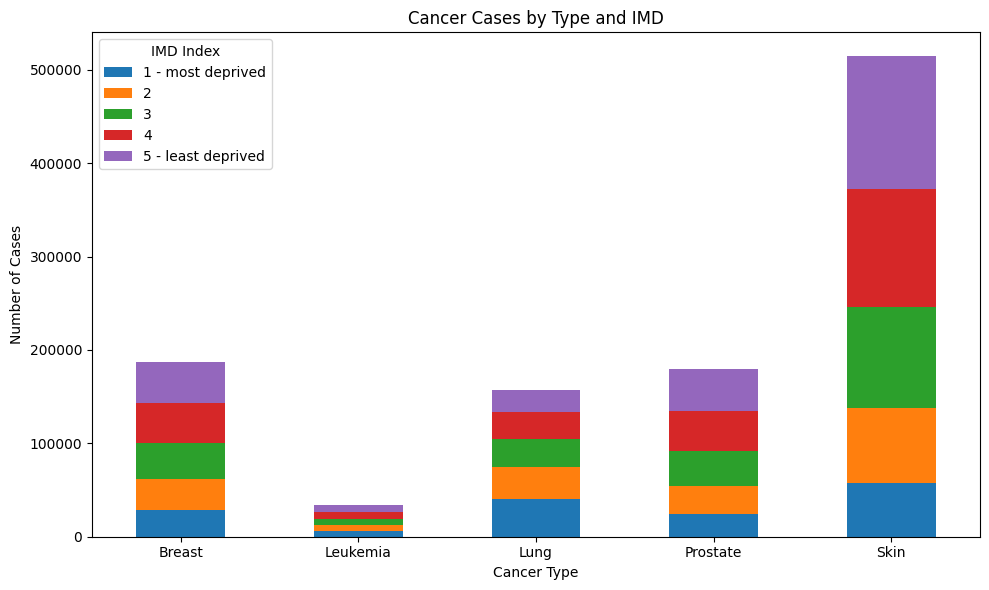

In [27]:
create_stacked_chart(df=location_count_df_v2, x_col="SITE_ICD10_O2_3CHAR", y_col="QUINTILE_2019", values="Count", x_label="Cancer Type", y_label="Number of Cases", title="Cancer Cases by Type and IMD", legend_title="IMD Index")

Version 2 Stats:


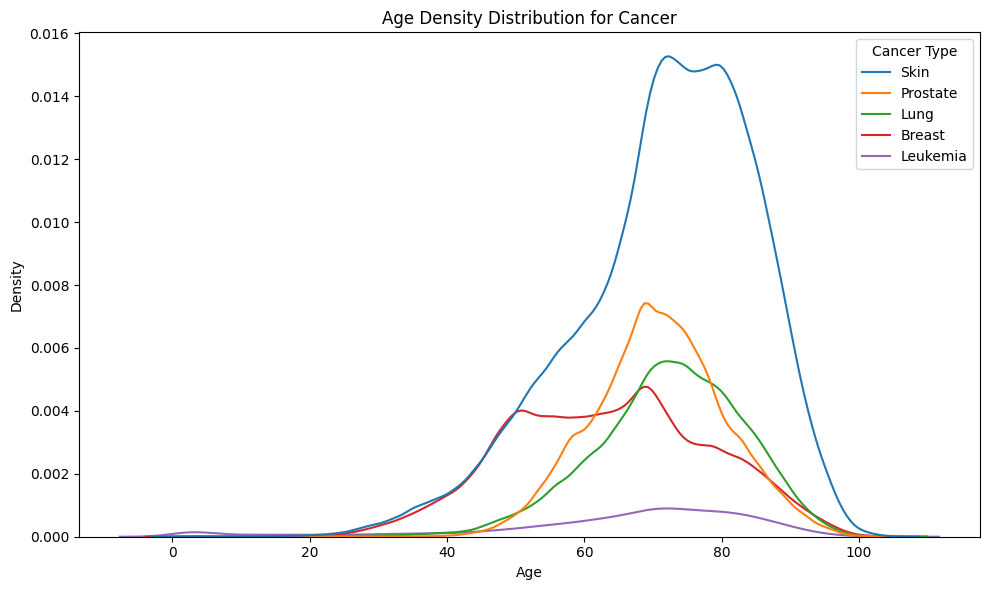

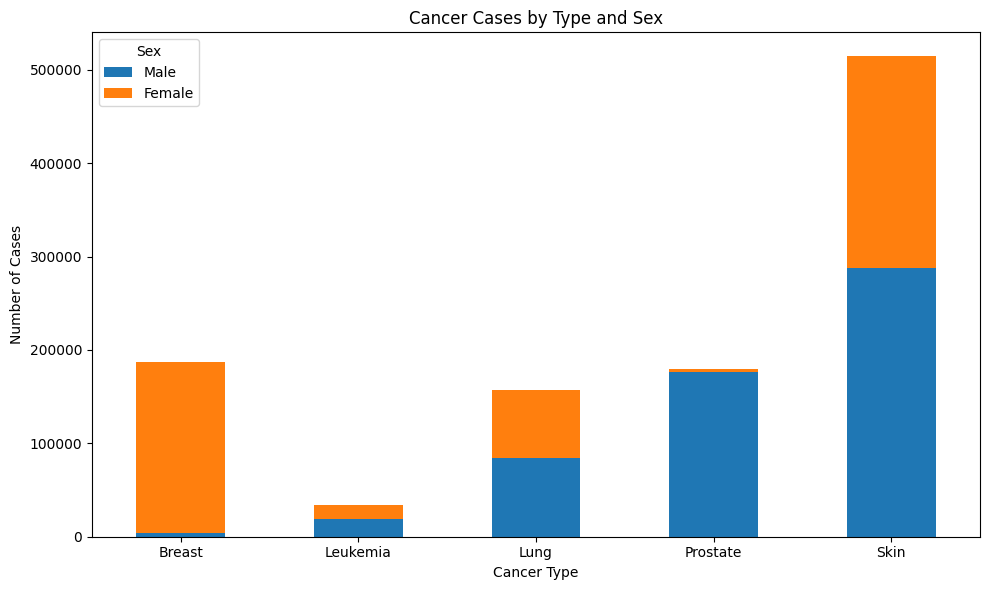

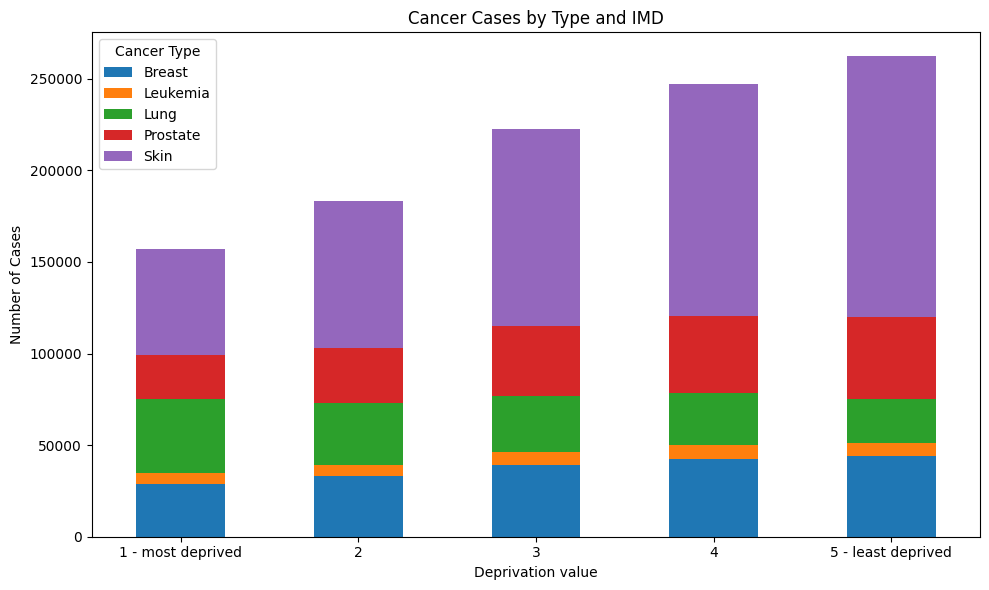

In [26]:
print("Version 2 Stats:")

sex_count_df_v2 = selected_patient_tumour_v2.groupby(["SITE_ICD10_O2_3CHAR", "GENDER_x"])["PATIENTID"].count().reset_index(name="Count")
location_count_df_v2 = selected_patient_tumour_v2.groupby(["SITE_ICD10_O2_3CHAR", "QUINTILE_2019"])["PATIENTID"].count().reset_index(name="Count")

create_pdf(df=selected_patient_tumour_v2, title="Age Density Distribution for Cancer", x_col="AGE", hue_col="SITE_ICD10_O2_3CHAR", x_label="Age", y_label="Density", legend_title="Cancer Type")
create_stacked_chart(df=sex_count_df_v2, x_col="SITE_ICD10_O2_3CHAR", y_col="GENDER_x", values="Count", x_label="Cancer Type", y_label="Number of Cases", title="Cancer Cases by Type and Sex", legend_title="Sex", hue_names=["Male", "Female"])
# create_stacked_chart(df=location_count_df_v2, x_col="SITE_ICD10_O2_3CHAR", y_col="QUINTILE_2019", values="Count", x_label="Cancer Type", y_label="Number of Cases", title="Cancer Cases by Type and IMD", legend_title="IMD Index")
create_stacked_chart(df=location_count_df_v2, x_col="QUINTILE_2019", y_col="SITE_ICD10_O2_3CHAR", values="Count", x_label="Deprivation value", y_label="Number of Cases", title="Cancer Cases by Type and IMD", legend_title="Cancer Type")

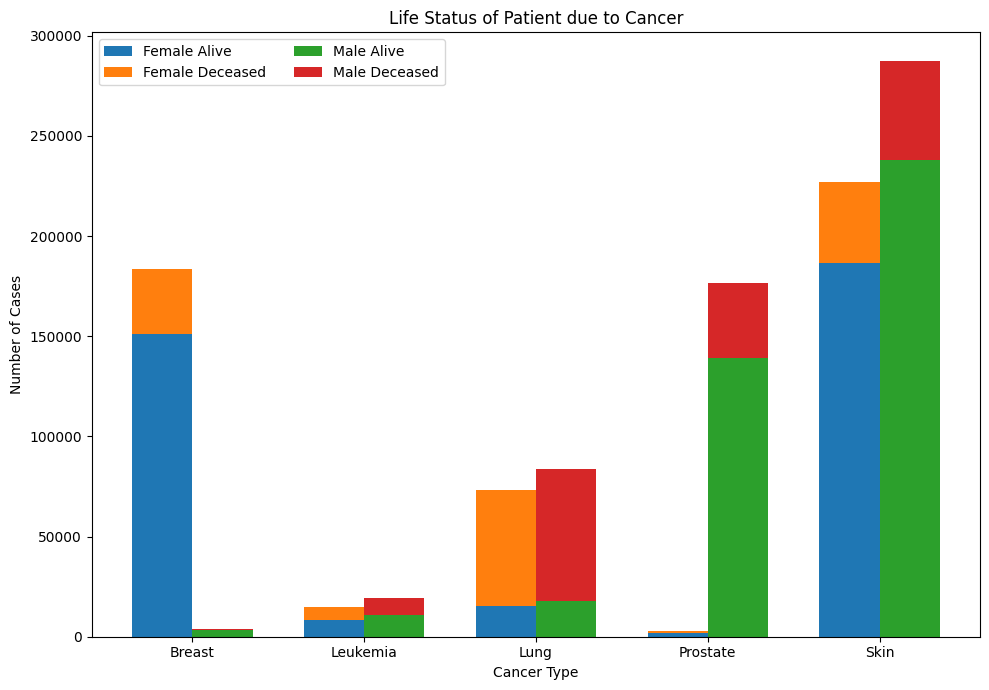

In [31]:
import copy
import numpy as np

status_count_df_v2 = selected_patient_tumour_v2.groupby(["SITE_ICD10_O2_3CHAR", "GENDER_x", "VITALSTATUS"])["PATIENTID"].count().reset_index(name="Count")

status_count_df_v2["GENDER_x"] = status_count_df_v2["GENDER_x"].map({1: 'Male', 2: 'Female'})
grouped_stack(df=status_count_df_v2, x_ticks=["SITE_ICD10_O2_3CHAR", 'GENDER_x'], stack_col="VITALSTATUS", val_col="Count", legen_val=["Alive", "Deceased"], x_label="Cancer Type", y_label="Number of Cases", title="Life Status of Patient due to Cancer")

In [32]:
def stage_cleaning(stage):
  if not pd.isna(stage):
    if re.match(r"^0", stage):
      return '0'
    elif re.match(r'^1', stage):
      return '1'
    elif re.match(r'^2', stage):
      return '2'
    elif re.match(r'^3', stage):
      return '3'
    elif re.match(r'^4', stage):
      return '4'
    elif re.match(r'^5', stage):
      return '5'
  return 'Unknown'

selected_patient_tumour_v2['STAGE_BEST'] = selected_patient_tumour_v2["STAGE_BEST"].apply(stage_cleaning)

selected_patient_tumour_v2 = selected_patient_tumour_v2.query('STAGE_BEST!="Unknown"')
selected_patient_tumour_v2['GRADE'] = selected_patient_tumour_v2['GRADE'].map({
  'G': 'Low', 'G1': 'Low', 'G2': 'Moderate', 'G3': 'High', 'G4': 'High', 'GL': 'Low', 'GI': 'Moderate', 'GH': 'High', 'GX': 'Unknown'
})

C:\Users\maran\AppData\Local\Temp\ipykernel_10152\4156299778.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_patient_tumour_v2['GRADE'] = selected_patient_tumour_v2['GRADE'].map({


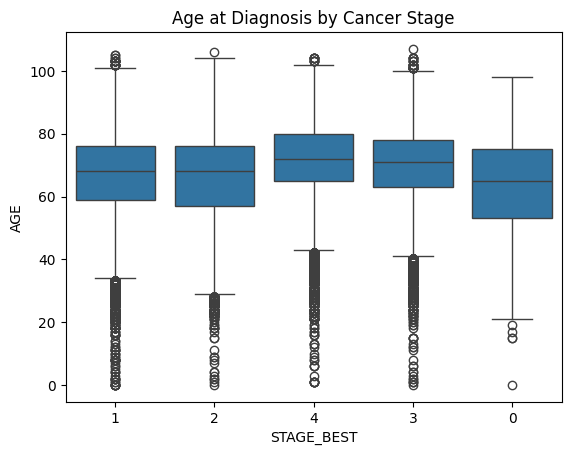

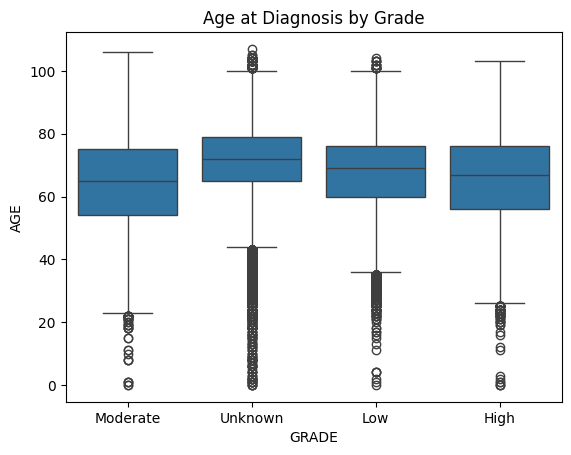

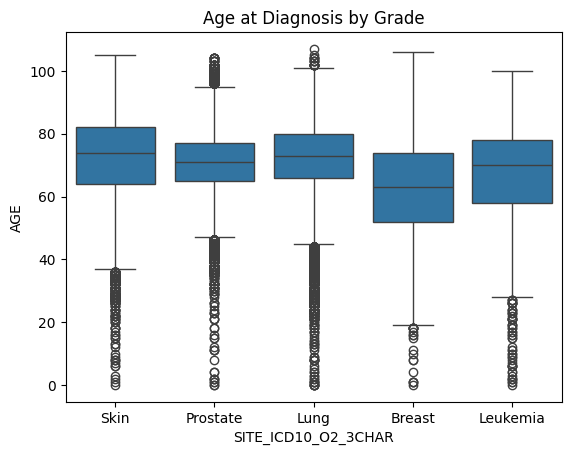

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='STAGE_BEST', y='AGE', data=selected_patient_tumour_v2)
plt.title("Age at Diagnosis by Cancer Stage")
plt.show()

sns.boxplot(x='GRADE', y='AGE', data=selected_patient_tumour_v2)
plt.title("Age at Diagnosis by Grade")
plt.show()

sns.boxplot(x='SITE_ICD10_O2_3CHAR', y='AGE', data=selected_patient_tumour_v2)
plt.title("Age at Diagnosis by Grade")
plt.show()

In [83]:
pd.set_option('display.max_columns', None)

final_stage_df = selected_patient_tumour_v2.query('STAGE_BEST!="Unknown"')[['PATIENTID', 'VITALSTATUS', 'STAGE_BEST']]
patient_with_sact_v2 = pd.merge(final_stage_df, sact_regimen_v2, left_on="PATIENTID", right_on="ENCORE_PATIENT_ID", how="inner")[['PATIENTID', 'ENCORE_PATIENT_ID', 'VITALSTATUS', 'STAGE_BEST']]
patient_without_sact_v2 = stage_df[~final_stage_df['PATIENTID'].isin(patient_with_sact_v2['ENCORE_PATIENT_ID'])]
patient_with_rtds_v2 = pd.merge(final_stage_df, rtds_combined[['PATIENTID']], left_on="PATIENTID", right_on="PATIENTID", how="inner")[['PATIENTID', 'VITALSTATUS', 'STAGE_BEST']]
patient_without_rtds_v2 = final_stage_df[~stage_df['PATIENTID'].isin(patient_with_rtds_v2['PATIENTID'])]

chemo_ids = set(sact_regimen_v2['ENCORE_PATIENT_ID'])
radio_ids = set(rtds_combined['PATIENTID'])
either = chemo_ids.union(radio_ids)
patient_with_therapy_v2 = stage_df[final_stage_df['PATIENTID'].isin(either)]
patient_without_therapy_v2 = patient_without_sact_v2[~patient_without_sact_v2['PATIENTID'].isin(patient_with_rtds_v2['PATIENTID'])]

patient_with_both_therapy_v2 = patient_with_sact_v2[patient_with_sact_v2['PATIENTID'].isin(radio_ids)]

print(len(stage_df.index))
print(len(patient_with_therapy_v2.index))
print(len(patient_without_therapy_v2.index))

482208
273104
209104


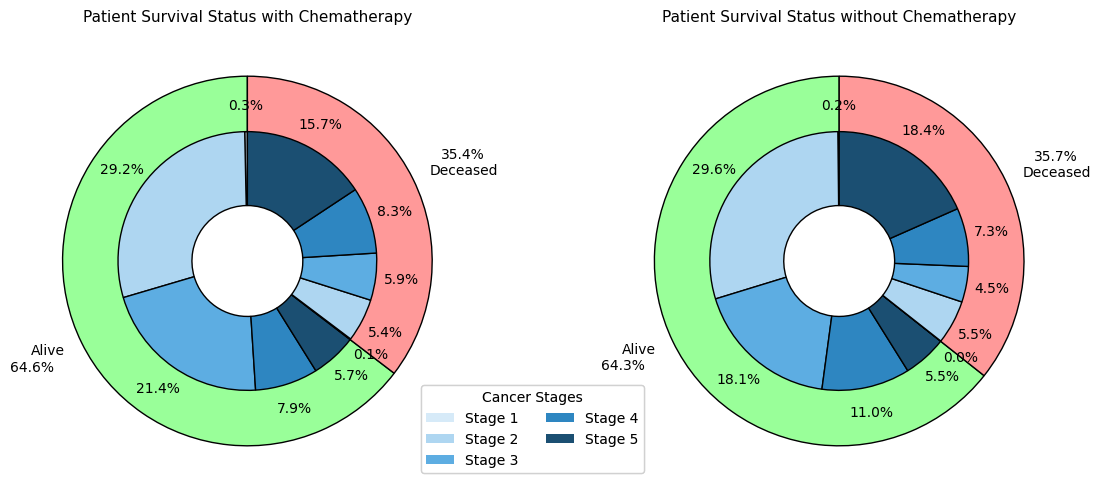

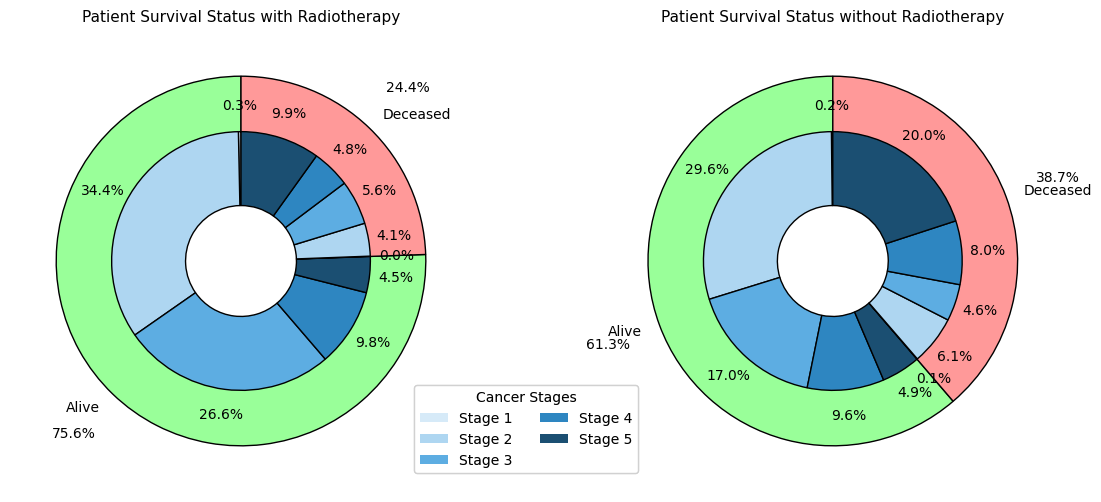

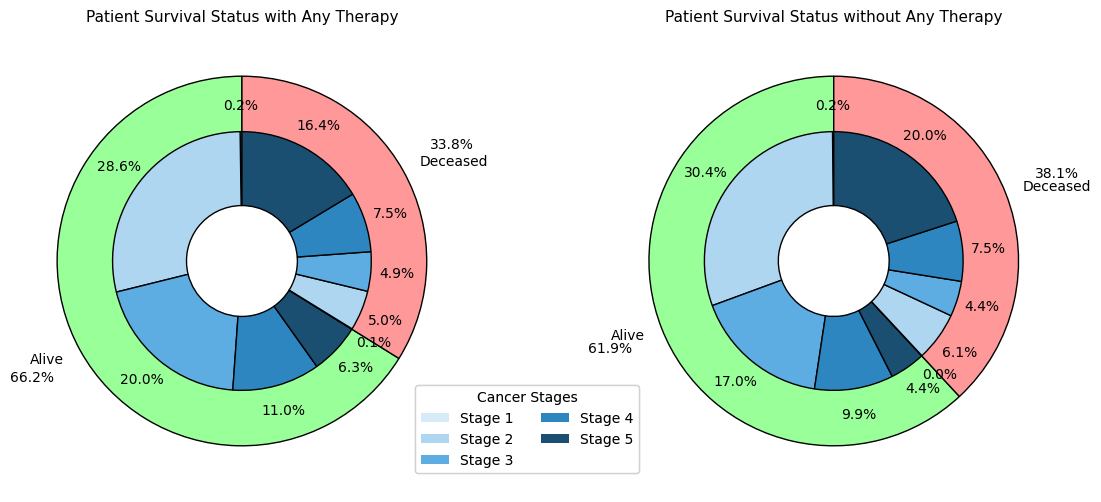

In [84]:
import numpy as np
from matplotlib.patches import Patch

def create_doughnut_chart(df, title, ax, outer_col, outer_data_categories, inner_col, inner_data_categories, inner_data_labels):
  out_cat_len = len(outer_data_categories)
  in_cat_len = len(inner_data_categories)
  out_count = len(df.index)
  
  out_values = np.zeros(out_cat_len)
  inner_values = np.zeros(out_cat_len * in_cat_len)
  for index, o_c in enumerate(outer_data_categories):
    cat_df = df.query(f"{outer_col}=='{o_c}'")
    out_cat_count = len(cat_df.index)
    out_values[index] = (out_cat_count/out_count)*100
    for i_index, i_c in enumerate(inner_data_categories):
      array_index = i_index + index * in_cat_len
      inner_cat_count = len(cat_df.query(f"{inner_col}=='{i_c}'").index)
      inner_values[array_index] = (inner_cat_count/out_cat_count)*out_values[index]

  outer_colors = ['#99ff99', '#ff9999']
  inner_colors = ['#D6EAF8', '#AED6F1', '#5DADE2', '#2E86C1', '#1B4F72']
  ax.pie(out_values, labels=outer_data_categories, startangle=90,  autopct='%1.1f%%', colors=outer_colors, wedgeprops={'edgecolor': 'black', 'width': 0.4}, pctdistance=1.3)

  wedges, texts, autotexts = ax.pie(inner_values, colors=inner_colors, autopct='%1.1f%%', radius=0.7, startangle=90, wedgeprops={'edgecolor': 'black', 'width': 0.4}, pctdistance=1.2)

  inner_legend = [Patch(facecolor=inner_colors[i], label=inner_data_labels[i]) for i in range(len(inner_data_labels))]
  fig.legend(handles=inner_legend, title="Cancer Stages", loc="upper left", bbox_to_anchor=(0.42, 0.3), ncol=2)
  ax.set_title(title, fontsize=11)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
create_doughnut_chart(df=patient_with_sact_v2, title="Patient Survival Status with Chematherapy", ax=ax1, outer_col="VITALSTATUS", outer_data_categories=["Alive", "Deceased"], inner_col="STAGE_BEST", inner_data_categories=['0', '1', '2', '3', '4'], inner_data_labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5'])
create_doughnut_chart(df=patient_without_sact_v2, title="Patient Survival Status without Chematherapy", ax=ax2, outer_col="VITALSTATUS", outer_data_categories=["Alive", "Deceased"], inner_col="STAGE_BEST", inner_data_categories=['0', '1', '2', '3', '4'], inner_data_labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5'])
plt.tight_layout
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
create_doughnut_chart(df=patient_with_rtds_v2, title="Patient Survival Status with Radiotherapy", ax=ax1, outer_col="VITALSTATUS", outer_data_categories=["Alive", "Deceased"], inner_col="STAGE_BEST", inner_data_categories=['0', '1', '2', '3', '4'], inner_data_labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5'])
create_doughnut_chart(df=patient_without_rtds_v2, title="Patient Survival Status without Radiotherapy", ax=ax2, outer_col="VITALSTATUS", outer_data_categories=["Alive", "Deceased"], inner_col="STAGE_BEST", inner_data_categories=['0', '1', '2', '3', '4'], inner_data_labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5'])
plt.tight_layout
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# create_doughnut_chart(df=patient_with_therapy_v2, title="Patient Survival Status with Atleast One Therapy", ax=ax1, outer_col="VITALSTATUS", outer_data_categories=["Alive", "Deceased"], inner_col="STAGE_BEST", inner_data_categories=['0', '1', '2', '3', '4'], inner_data_labels=['Stage 0', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'])
create_doughnut_chart(df=patient_with_therapy_v2, title="Patient Survival Status with Any Therapy", ax=ax1, outer_col="VITALSTATUS", outer_data_categories=["Alive", "Deceased"], inner_col="STAGE_BEST", inner_data_categories=['0', '1', '2', '3', '4'], inner_data_labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5'])
create_doughnut_chart(df=patient_without_therapy_v2, title="Patient Survival Status without Any Therapy", ax=ax2, outer_col="VITALSTATUS", outer_data_categories=["Alive", "Deceased"], inner_col="STAGE_BEST", inner_data_categories=['0', '1', '2', '3', '4'], inner_data_labels=['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5'])
plt.tight_layout
plt.show()


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters found: {'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 1.0}
Root Mean Squared Error (RMSE) of the best model: 12.015528486283385


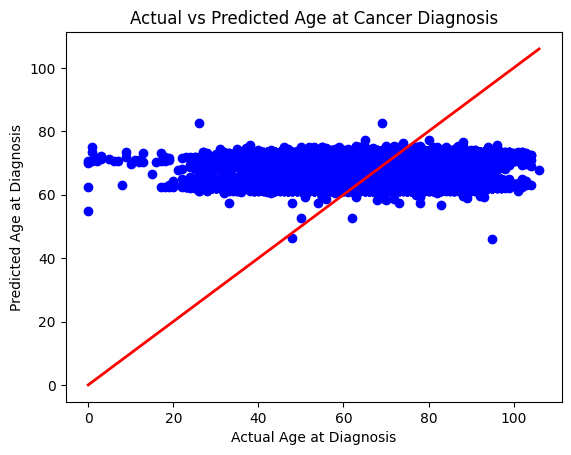

In [85]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import xgboost as xgb

final_stage_df = selected_patient_tumour_v2.query('STAGE_BEST!="Unknown"')
training_columns = final_stage_df[['GRADE', 'GENDER_x', 'STAGE_BEST', 'QUINTILE_2019', 'SITE_ICD10_O2_3CHAR']]
target_column = final_stage_df['AGE']

categorical_cols = ['GENDER_x', 'STAGE_BEST', 'GRADE', 'QUINTILE_2019', 'SITE_ICD10_O2_3CHAR']  

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols) 
    ],
    remainder='passthrough'  
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse'))
])

X_train, X_test, y_train, y_test = train_test_split(training_columns, target_column, test_size=0.2, random_state=42)

param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [6, 10],
    'model__learning_rate': [0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Best parameters found: {best_params}")

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE) of the best model: {rmse}")

plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Age at Diagnosis')
plt.ylabel('Predicted Age at Diagnosis')
plt.title('Actual vs Predicted Age at Cancer Diagnosis')
plt.show()


In [87]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 9.51
Mean Squared Error (MSE): 144.37
Root Mean Squared Error (RMSE): 144.37
R-squared (R²): 0.1007
